In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sejongai-challenge-pretest-1/test_data.csv
/kaggle/input/sejongai-challenge-pretest-1/train.csv
/kaggle/input/sejongai-challenge-pretest-1/submit_sample.csv


## Data 살펴보기

In [2]:
train_df = pd.read_csv('/kaggle/input/sejongai-challenge-pretest-1/train.csv')
test_df = pd.read_csv('/kaggle/input/sejongai-challenge-pretest-1/test_data.csv')
submission = pd.read_csv('/kaggle/input/sejongai-challenge-pretest-1/submit_sample.csv')

In [3]:
display(train_df.head())
display(test_df.head())

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0.0
1,1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1.0
2,2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0.0
3,3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1.0
4,4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0.0


,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,-0.882353,0.085427,-0.016393,-0.070707,-0.579196,0.058122,-0.712212,-0.900000
1,1,-0.411765,-0.025126,0.245902,-0.454545,0.000000,0.061103,-0.743809,0.033333
2,2,-0.529412,-0.165829,0.409836,-0.616162,0.000000,-0.126677,-0.795901,-0.566667
3,3,-0.882353,0.145729,0.081967,-0.272727,-0.527187,0.135618,-0.819812,0.000000
4,4,-0.882353,0.497487,0.114754,-0.414141,-0.699764,-0.126677,-0.768574,-0.300000


In [4]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       709 non-null    float64
 1   1       709 non-null    float64
 2   2       709 non-null    float64
 3   3       709 non-null    float64
 4   4       709 non-null    float64
 5   5       709 non-null    float64
 6   6       709 non-null    float64
 7   7       709 non-null    float64
 8   8       709 non-null    float64
dtypes: float64(9)
memory usage: 50.0 KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50 non-null     float64
 1   1       50 non-null     float64
 2   2       50 non-null     float64
 3   3       50 non-null     float64
 4   4       50 non-null     float64
 5   5       50 non-null     float64
 6   6       50 non-null     float64
 7   7       50 non-null     float64
dtypes: float64(8)
memory usage: 3.2 KB


In [7]:
train_df.describe()

,0,1,2,3,4,5,6,7,8
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,-0.402887,0.217576,0.173114,-0.291362,-0.324907,-0.034931,-0.660509,-0.517913,0.655853
std,0.384125,0.307420,0.201122,0.261057,0.376587,0.206563,0.286892,0.401090,0.475425
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.183308,-0.861657,-0.866667,0.000000
50%,-0.411765,0.165829,0.147541,-0.292929,0.000000,-0.037258,-0.745517,-0.666667,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.084948,-0.522630,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train_df['8'].value_counts()

1.0    465
0.0    244
Name: 8, dtype: int64

## Baseline Model

In [9]:
from sklearn.model_selection import train_test_split

df_copy = train_df.copy()

X_features = df_copy.iloc[:, :-1]
y_target = df_copy.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((496, 8), (496,)) ((213, 8), (213,))


In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba) # 각 클래스에 대한 확률
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, AUC:{3:.4f}'.format(accuracy, precision, recall, roc_auc))
    print('\n')

In [11]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=5, min_child_weight=1.0, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=0)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

[0]	validation_0-error:0.18750	validation_1-error:0.26761
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.16936	validation_1-error:0.29108
[2]	validation_0-error:0.16734	validation_1-error:0.27699
[3]	validation_0-error:0.16734	validation_1-error:0.28169
[4]	validation_0-error:0.16532	validation_1-error:0.27230
[5]	validation_0-error:0.16734	validation_1-error:0.27699
[6]	validation_0-error:0.16734	validation_1-error:0.27699
[7]	validation_0-error:0.16532	validation_1-error:0.27230
[8]	validation_0-error:0.16532	validation_1-error:0.27230
[9]	validation_0-error:0.16532	validation_1-error:0.27230
[10]	validation_0-error:0.16532	validation_1-error:0.27230
[11]	validation_0-error:0.16532	validation_1-error:0.27230
[12]	validation_0-error:0.16331	validation_1-error:0.25352
[13]	validation_0-error:0.16331	validation_1-error:0.25352
[14]	validation_0-erro

In [12]:
def get_model_train_eval(y_test, clf, clf_pred, clf_pred_proba):
    print('## {} 예측 성능'.format(clf.__class__.__name__))
    get_clf_eval(y_test, clf_pred, clf_pred_proba)
    print('\n')

get_model_train_eval(y_test, lr_clf, lr_pred, lr_pred_proba)
get_model_train_eval(y_test, rf_clf, rf_pred, rf_pred_proba)
get_model_train_eval(y_test, xgb_clf, xgb_pred, xgb_pred_proba)
get_model_train_eval(y_test, dt_clf, dt_pred, dt_pred_proba)

## LogisticRegression 예측 성능
오차 행렬
[[ 38  32]
 [ 21 122]]
정확도: 0.7512, 정밀도: 0.7922, 재현율: 0.8531, AUC:0.8157




## RandomForestClassifier 예측 성능
오차 행렬
[[ 33  37]
 [ 19 124]]
정확도: 0.7371, 정밀도: 0.7702, 재현율: 0.8671, AUC:0.8159




## XGBClassifier 예측 성능
오차 행렬
[[ 43  27]
 [ 26 117]]
정확도: 0.7512, 정밀도: 0.8125, 재현율: 0.8182, AUC:0.7781




## DecisionTreeClassifier 예측 성능
오차 행렬
[[ 27  43]
 [ 12 131]]
정확도: 0.7418, 정밀도: 0.7529, 재현율: 0.9161, AUC:0.7680






## EDA & feature engineering

### IQR을 이용한 이상치 제거

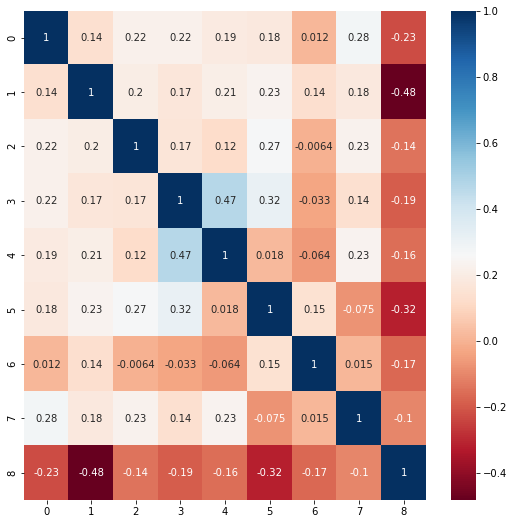

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,9))
corr = train_df.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)

In [14]:
# 결정 레이블인 class와 음의 상관관계가 가장 높은 피처는 1번과 5번
# 1번에 대해서만 이상치를 찾아 제거해보자

diabetes = train_df[train_df['8']==1]['1']
quantile_25 = np.percentile(diabetes.values, 25)
quantile_75 = np.percentile(diabetes.values, 75)

# IQR을 구하고, IQR에 1.5를 곱해 최댓갑과 최솟값 지점 구함
iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = diabetes[(diabetes < lowest_val) | (diabetes > highest_val)].index
print('이상치 데이터 인덱스: ', outlier_index)

이상치 데이터 인덱스:  Int64Index([38, 60, 210, 226, 255, 256, 322, 480, 482, 541, 614], dtype='int64')


In [15]:
df_copy.drop(outlier_index, axis=0, inplace=True)
df_copy.reset_index(drop=True, inplace=True) # 1번 칼럼 이상치 제거

X_features = df_copy.iloc[:, :-1]
y_target = df_copy.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((488, 8), (488,)) ((210, 8), (210,))


In [16]:
#lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

#rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

#xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=5, min_child_weight=1.0, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

#dt_clf = DecisionTreeClassifier(max_depth=5, random_state=0)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

[0]	validation_0-error:0.15779	validation_1-error:0.28095
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.15779	validation_1-error:0.28095
[2]	validation_0-error:0.15779	validation_1-error:0.28095
[3]	validation_0-error:0.14139	validation_1-error:0.26190
[4]	validation_0-error:0.13934	validation_1-error:0.25238
[5]	validation_0-error:0.14139	validation_1-error:0.26190
[6]	validation_0-error:0.13934	validation_1-error:0.25714
[7]	validation_0-error:0.13730	validation_1-error:0.25714
[8]	validation_0-error:0.13730	validation_1-error:0.25714
[9]	validation_0-error:0.13730	validation_1-error:0.25714
[10]	validation_0-error:0.13115	validation_1-error:0.26190
[11]	validation_0-error:0.13320	validation_1-error:0.25714
[12]	validation_0-error:0.13320	validation_1-error:0.25714
[13]	validation_0-error:0.12910	validation_1-error:0.26190
[14]	validation_0-erro

In [17]:
get_model_train_eval(y_test, lr_clf, lr_pred, lr_pred_proba)
get_model_train_eval(y_test, rf_clf, rf_pred, rf_pred_proba)
get_model_train_eval(y_test, xgb_clf, xgb_pred, xgb_pred_proba)
get_model_train_eval(y_test, dt_clf, dt_pred, dt_pred_proba)

## LogisticRegression 예측 성능
오차 행렬
[[ 37  35]
 [ 16 122]]
정확도: 0.7571, 정밀도: 0.7771, 재현율: 0.8841, AUC:0.7975




## RandomForestClassifier 예측 성능
오차 행렬
[[ 41  31]
 [ 17 121]]
정확도: 0.7714, 정밀도: 0.7961, 재현율: 0.8768, AUC:0.8054




## XGBClassifier 예측 성능
오차 행렬
[[ 45  27]
 [ 26 112]]
정확도: 0.7476, 정밀도: 0.8058, 재현율: 0.8116, AUC:0.7733




## DecisionTreeClassifier 예측 성능
오차 행렬
[[ 44  28]
 [ 29 109]]
정확도: 0.7286, 정밀도: 0.7956, 재현율: 0.7899, AUC:0.7492






RandomForestClassifier 특성 중요도 : 
[0.05857957 0.40635359 0.05212573 0.06433392 0.08016777 0.18478249
 0.06467718 0.08897974]


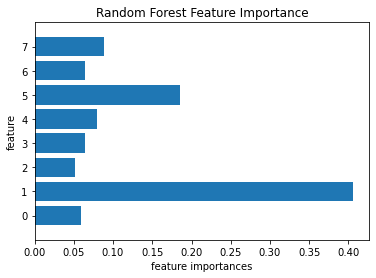

In [18]:
# RF 특성 중요도
print("{} 특성 중요도 : \n{}".format(rf_clf.__class__.__name__, rf_clf.feature_importances_))


# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
    n_features = X_features.shape[1]
    plt.barh(range(n_features), rf_clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_features.columns)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.title('Random Forest Feature Importance')

plt.show()

plot_feature_importances_cancer(rf_clf)

XGBClassifier 특성 중요도 : 
[0.07754714 0.43483132 0.05785559 0.04608243 0.06222508 0.19524968
 0.04671244 0.07949628]


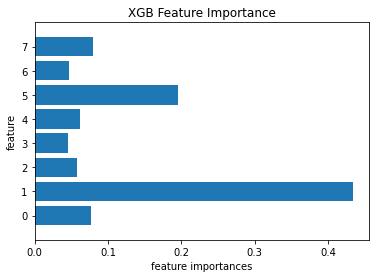

In [19]:
# XGB 특성 중요도
print("{} 특성 중요도 : \n{}".format(xgb_clf.__class__.__name__, xgb_clf.feature_importances_))


# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
    n_features = X_features.shape[1]
    plt.barh(range(n_features), xgb_clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_features.columns)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.title('XGB Feature Importance')

plt.show()

plot_feature_importances_cancer(xgb_clf)

### feature 분포 확인

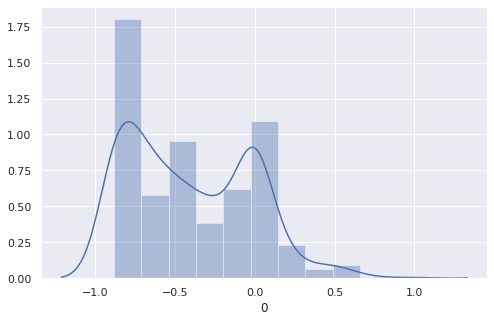

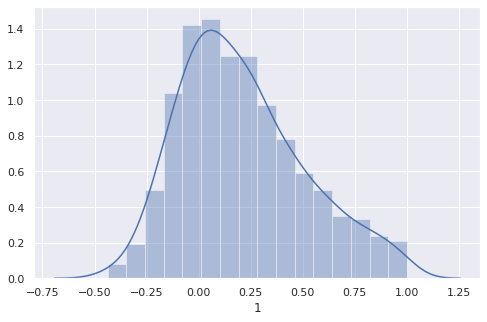

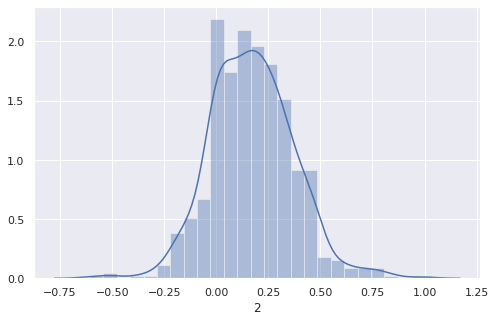

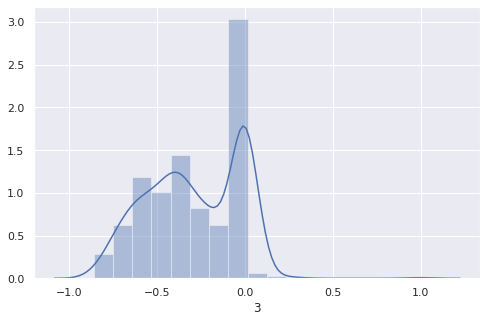

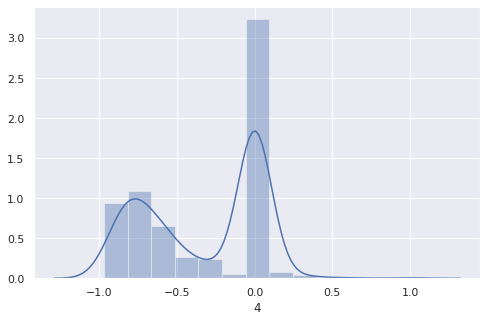

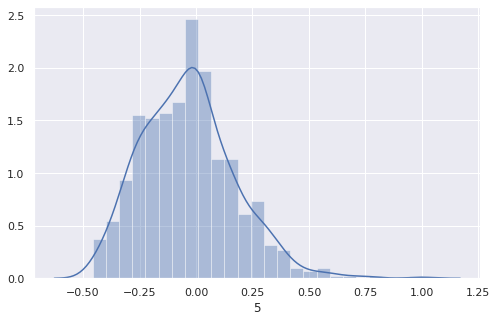

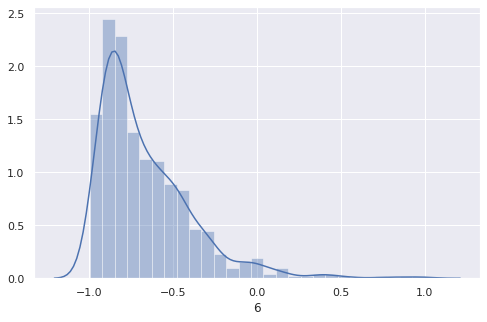

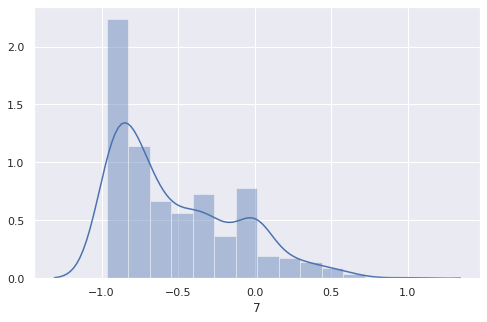

In [20]:
sns.set()
for col in X_features.columns:
    flg, ax = plt.subplots(1, 1, figsize=(8,5))
    sns.distplot(df_copy[col])

In [21]:
log_df = df_copy.drop('8', axis=1).copy()
log_df = np.log1p(log_df)
log_df

,0,1,2,3,4,5,6,7
0,-0.348307,0.397055,0.165792,-0.346624,0.000000,0.001489,-0.757515,-0.033902
1,-2.140067,-0.157507,0.078781,-0.534676,0.000000,-0.232125,-1.456142,-1.098613
2,-0.060625,0.609329,0.048009,0.000000,0.000000,-0.364583,-0.678734,-1.003301
3,-2.140067,-0.111522,0.078781,-0.766479,-1.504078,-0.177267,-2.576982,0.000000
4,0.000000,0.319823,-0.421994,-0.346624,-0.923409,0.250486,0.635135,-0.916291
...,...,...,...,...,...,...,...,...
693,0.000000,0.297682,-0.050431,-0.906241,-0.374049,-0.239673,-1.452485,0.000000
694,-1.041454,0.024815,0.193191,0.000000,0.000000,-0.128646,-3.304406,-1.003301
695,-0.194157,0.630951,-0.198851,-0.405465,-0.076110,0.010378,-0.448211,-0.836249
696,-1.041454,0.553134,0.245835,-0.238411,-0.827017,0.007424,-0.272147,-1.098613


In [22]:
X_features = log_df
y_target = df_copy.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((488, 8), (488,)) ((210, 8), (210,))


In [23]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=5, min_child_weight=1.0, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=0)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

[0]	validation_0-error:0.15779	validation_1-error:0.28095
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.15779	validation_1-error:0.28095
[2]	validation_0-error:0.15779	validation_1-error:0.28095
[3]	validation_0-error:0.14139	validation_1-error:0.26190
[4]	validation_0-error:0.13934	validation_1-error:0.25238
[5]	validation_0-error:0.14139	validation_1-error:0.26190
[6]	validation_0-error:0.13934	validation_1-error:0.25714
[7]	validation_0-error:0.13730	validation_1-error:0.25714
[8]	validation_0-error:0.13730	validation_1-error:0.25714
[9]	validation_0-error:0.13730	validation_1-error:0.25714
[10]	validation_0-error:0.13115	validation_1-error:0.26190
[11]	validation_0-error:0.13320	validation_1-error:0.25714
[12]	validation_0-error:0.13320	validation_1-error:0.25714
[13]	validation_0-error:0.12910	validation_1-error:0.26190
[14]	validation_0-erro

In [24]:
get_model_train_eval(y_test, lr_clf, lr_pred, lr_pred_proba)
get_model_train_eval(y_test, rf_clf, rf_pred, rf_pred_proba)
get_model_train_eval(y_test, xgb_clf, xgb_pred, xgb_pred_proba)
get_model_train_eval(y_test, dt_clf, dt_pred, dt_pred_proba)

## LogisticRegression 예측 성능
오차 행렬
[[ 41  31]
 [ 18 120]]
정확도: 0.7667, 정밀도: 0.7947, 재현율: 0.8696, AUC:0.8004




## RandomForestClassifier 예측 성능
오차 행렬
[[ 41  31]
 [ 19 119]]
정확도: 0.7619, 정밀도: 0.7933, 재현율: 0.8623, AUC:0.8066




## XGBClassifier 예측 성능
오차 행렬
[[ 45  27]
 [ 26 112]]
정확도: 0.7476, 정밀도: 0.8058, 재현율: 0.8116, AUC:0.7733




## DecisionTreeClassifier 예측 성능
오차 행렬
[[ 44  28]
 [ 29 109]]
정확도: 0.7286, 정밀도: 0.7956, 재현율: 0.7899, AUC:0.7492






### 각 feature마다 target값에 따른 분포 확인하여 이상치 제거

In [25]:
df_drop_outlier = df_copy.copy()

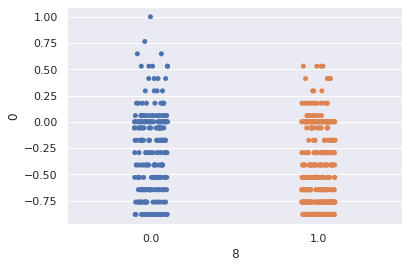

In [26]:
sns.stripplot(x="8", y='0', data=df_drop_outlier, jitter=True)

In [27]:
drop_index_0 = df_drop_outlier[df_drop_outlier['0'] > 0.25].index
df_drop_outlier.drop(drop_index_0, axis=0, inplace=True)
df_drop_outlier.reset_index(drop=True, inplace=True)

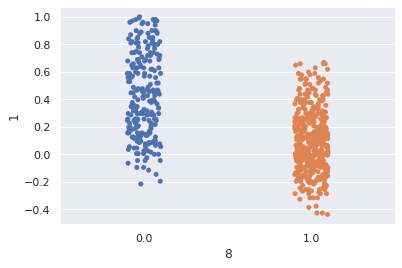

In [28]:
sns.stripplot(x="8", y='1', data=df_drop_outlier, jitter=True)

In [29]:
drop_index_1 = df_drop_outlier[df_drop_outlier['1'] < -0.4].index
df_drop_outlier.drop(drop_index_1, axis=0, inplace=True)
df_drop_outlier.reset_index(drop=True, inplace=True)

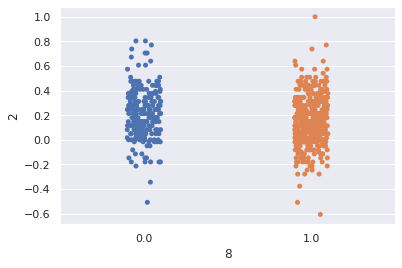

In [30]:
sns.stripplot(x="8", y='2', data=df_drop_outlier, jitter=True)

In [31]:
drop_index_2 = df_drop_outlier[(df_drop_outlier['2'] > 0.6) | (df_drop_outlier['2'] < -0.2)].index
df_drop_outlier.drop(drop_index_2, axis=0, inplace=True)
df_drop_outlier.reset_index(drop=True, inplace=True)

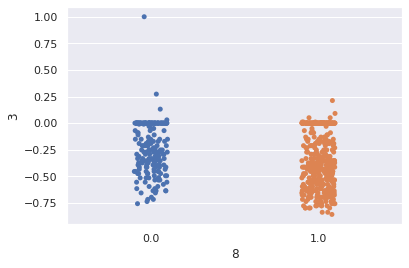

In [32]:
sns.stripplot(x="8", y='3', data=df_drop_outlier, jitter=True)

In [33]:
drop_index_3 = df_drop_outlier[df_drop_outlier['3'] > 0.00].index
df_drop_outlier.drop(drop_index_3, axis=0, inplace=True)
df_drop_outlier.reset_index(drop=True, inplace=True)

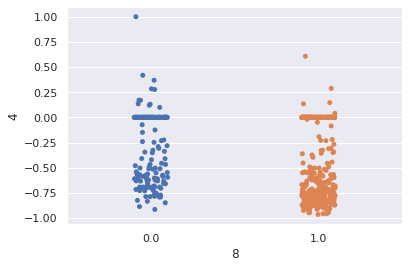

In [34]:
sns.stripplot(x="8", y='4', data=df_drop_outlier, jitter=True)

In [35]:
drop_index_4 = df_drop_outlier[df_drop_outlier['3'] > 0.00].index
df_drop_outlier.drop(drop_index_4, axis=0, inplace=True)
df_drop_outlier.reset_index(drop=True, inplace=True)

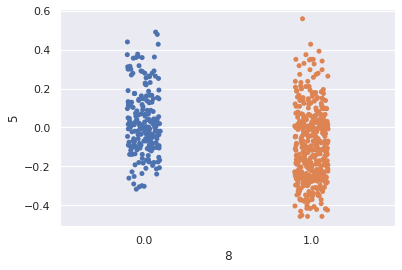

In [36]:
sns.stripplot(x="8", y='5', data=df_drop_outlier, jitter=True)

In [37]:
drop_index_5 = df_drop_outlier[df_drop_outlier['5'] > 0.5].index
df_drop_outlier.drop(drop_index_5, axis=0, inplace=True)
df_drop_outlier.reset_index(drop=True, inplace=True)

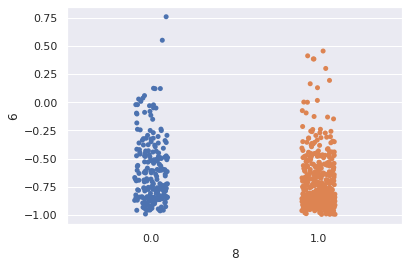

In [38]:
sns.stripplot(x="8", y='6', data=df_drop_outlier, jitter=True)

In [39]:
drop_index_6 = df_drop_outlier[df_drop_outlier['6'] > 0.2].index
df_drop_outlier.drop(drop_index_6, axis=0, inplace=True)
df_drop_outlier.reset_index(drop=True, inplace=True)

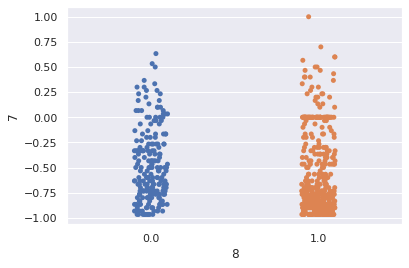

In [40]:
sns.stripplot(x="8", y='7', data=df_drop_outlier, jitter=True)

In [41]:
drop_index_7 = df_drop_outlier[df_drop_outlier['7'] > 0.5].index
df_drop_outlier.drop(drop_index_7, axis=0, inplace=True)
df_drop_outlier.reset_index(drop=True, inplace=True)

In [42]:
X_features = df_drop_outlier.iloc[:, :-1]
y_target = df_drop_outlier.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((427, 8), (427,)) ((183, 8), (183,))


In [43]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=0)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=7, min_child_weight=1.0, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

[0]	validation_0-error:0.12646	validation_1-error:0.30601
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.11944	validation_1-error:0.29508
[2]	validation_0-error:0.12646	validation_1-error:0.27322
[3]	validation_0-error:0.11944	validation_1-error:0.29508
[4]	validation_0-error:0.12646	validation_1-error:0.27322
[5]	validation_0-error:0.11710	validation_1-error:0.28415
[6]	validation_0-error:0.12646	validation_1-error:0.30055
[7]	validation_0-error:0.11944	validation_1-error:0.28962
[8]	validation_0-error:0.12646	validation_1-error:0.30055
[9]	validation_0-error:0.11944	validation_1-error:0.28962
[10]	validation_0-error:0.12178	validation_1-error:0.26776
[11]	validation_0-error:0.11475	validation_1-error:0.28962
[12]	validation_0-error:0.12178	validation_1-error:0.26776
[13]	validation_0-error:0.11475	validation_1-error:0.28962
[14]	validation_0-erro

[136]	validation_0-error:0.06323	validation_1-error:0.24590
[137]	validation_0-error:0.06323	validation_1-error:0.24590
[138]	validation_0-error:0.06089	validation_1-error:0.24590
[139]	validation_0-error:0.06089	validation_1-error:0.24590
[140]	validation_0-error:0.06089	validation_1-error:0.24590
[141]	validation_0-error:0.06089	validation_1-error:0.24590
[142]	validation_0-error:0.06089	validation_1-error:0.24590
[143]	validation_0-error:0.06089	validation_1-error:0.24590
[144]	validation_0-error:0.06089	validation_1-error:0.24590
[145]	validation_0-error:0.06089	validation_1-error:0.24044
[146]	validation_0-error:0.06089	validation_1-error:0.24044
[147]	validation_0-error:0.06089	validation_1-error:0.24044
[148]	validation_0-error:0.06089	validation_1-error:0.24044
[149]	validation_0-error:0.06089	validation_1-error:0.24044
[150]	validation_0-error:0.06089	validation_1-error:0.24044
[151]	validation_0-error:0.06089	validation_1-error:0.24044
[152]	validation_0-error:0.06089	validat

In [44]:
get_model_train_eval(y_test, lr_clf, lr_pred, lr_pred_proba)
get_model_train_eval(y_test, rf_clf, rf_pred, rf_pred_proba)
get_model_train_eval(y_test, xgb_clf, xgb_pred, xgb_pred_proba)
get_model_train_eval(y_test, dt_clf, dt_pred, dt_pred_proba)

## LogisticRegression 예측 성능
오차 행렬
[[ 35  31]
 [ 13 104]]
정확도: 0.7596, 정밀도: 0.7704, 재현율: 0.8889, AUC:0.8473




## RandomForestClassifier 예측 성능
오차 행렬
[[ 33  33]
 [  9 108]]
정확도: 0.7705, 정밀도: 0.7660, 재현율: 0.9231, AUC:0.8563




## XGBClassifier 예측 성능
오차 행렬
[[ 40  26]
 [ 17 100]]
정확도: 0.7650, 정밀도: 0.7937, 재현율: 0.8547, AUC:0.8004




## DecisionTreeClassifier 예측 성능
오차 행렬
[[49 17]
 [29 88]]
정확도: 0.7486, 정밀도: 0.8381, 재현율: 0.7521, AUC:0.8109






### RandomForestClassifier GridSearchCV 1

In [46]:
from sklearn.model_selection import KFold, GridSearchCV

params = {'max_depth':[6,7,8],
         'n_estimators':[500, 700, 900],
         'min_samples_leaf':[3,5,7,10],
         'min_samples_split':[2,3,5,10]}

cv = KFold(n_splits=5, random_state=1)
grid_model_rf = RandomForestClassifier(random_state=0)
clf_cv_rf = GridSearchCV(grid_model_rf, params, cv=cv, n_jobs=4, verbose=1)
clf_cv_rf.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
print('final params', clf_cv_rf.best_params_)   # 최적의 파라미터 값 출력
print('best score', clf_cv_rf.best_score_)      # 최고의 점수

In [ ]:
rf_clf_gs = RandomForestClassifier(**clf_cv_rf.best_params_)
rf_clf_gs.fit(X_train, y_train)
rf_pred_gs = rf_clf_gs.predict(X_test)
rf_pred_gs_proba = rf_clf_gs.predict_proba(X_test)[:, 1]

get_model_train_eval(y_test, rf_clf_gs, rf_pred_gs, rf_pred_gs_proba)

1. ### XGBClassifier GridSearchCV

In [ ]:
params ={'learning_rate':[0.01, 0.05, 0.1],
         'silent':[True],
         'max_depth':[7,8,9],
         'min_child_weight':[1.2,1.5,1.8],
         'colsample_bytree':[0.5,0.8],
         'colsample_bylevel':[0.9],
         'n_estimators':[500, 700]}

cv = KFold(n_splits=5, random_state=1)
grid_model2 = XGBClassifier(random_state=0)
clf_cv2 = GridSearchCV(grid_model2, params, cv=cv, n_jobs=4, verbose=1)
clf_cv2.fit(X_train, y_train)

In [ ]:
print('final params', clf_cv2.best_params_)   # 최적의 파라미터 값 출력
print('best score', clf_cv2.best_score_)      # 최고의 점수

In [ ]:
xgb_clf_gs2 = XGBClassifier(**clf_cv2.best_params_)
xgb_clf_gs2.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_pred_gs2 = xgb_clf_gs2.predict(X_test)
xgb_pred_gs2_proba = xgb_clf_gs2.predict_proba(X_test)[:, 1]

get_model_train_eval(y_test, xgb_clf_gs2, xgb_pred_gs2, xgb_pred_gs2_proba)

In [ ]:
result_rf2 = rf_clf_gs.predict(test_df)
result_xgb2 = xgb_clf_gs2.predict(test_df)

ensemble_pred = 0.6 * result_xgb2 + 0.4 * result_rf2 # xgb2, rf2
submission['Label'] = np.clip(ensemble_pred, 0 , max(ensemble_pred))
submission['Label'] = submission['Label'].astype(int)
submission.to_csv('diabetes_result6.csv', index=False)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {'learning_rate':[0.005,0.01,0.05], 
#           'max_depth':[6,7,8],
#           'min_child_weight':[1.0,1.2],
#           'n_estimators':[500,800,1000],
#           'colsample_bytree':[0.5,0.8]}

# cv = KFold(n_splits=5, random_state=1)
# grid_model = XGBClassifier(random_state=0)
# clf_cv = GridSearchCV(grid_model, params, cv=cv, n_jobs=4, verbose=1)
# clf_cv.fit(X_train, y_train)

In [ ]:
# print('final params', clf_cv.best_params_)   # 최적의 파라미터 값 출력
# print('best score', clf_cv.best_score_)      # 최고의 점수

In [ ]:
# xgb_clf_gs = XGBClassifier(**clf_cv.best_params_, random_state=0)
# xgb_clf_gs.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_train, y_train), (X_test, y_test)])
# xgb_pred_gs = xgb_clf_gs.predict(X_test)
# xgb_pred_gs_proba = xgb_clf_gs.predict_proba(X_test)[:, 1]

# get_model_train_eval(y_test, xgb_clf_gs, xgb_pred_gs, xgb_pred_gs_proba)

In [ ]:
# ensemble_pred = 0.6 * result_xgb2 + 0.4 * result # xgb, xgb2
# submission['Label'] = np.clip(ensemble_pred, 0 , max(ensemble_pred))
# submission['Label'] = submission['Label'].astype(int)
# submission.to_csv('diabetes_result5.csv', index=False)

In [ ]:
# # xgb with grid_search
# result = xgb_clf_gs.predict(test_df)

In [ ]:
# ensemble_pred = 0.6 * result + 0.4 * result_rf # xgb, rf
# submission['Label'] = np.clip(ensemble_pred, 0 , max(ensemble_pred))
# submission['Label'] = submission['Label'].astype(int)
# submission.to_csv('diabetes_result4.csv', index=False)